In [2]:
import numpy as np
#Dim = [28*28, 10]
#A = [tanh,softmax]

In [3]:
def tanh(x):
    return np.tanh(x)
tanh(0.1) # test

0.09966799462495582

In [4]:
import matplotlib.pyplot as plt

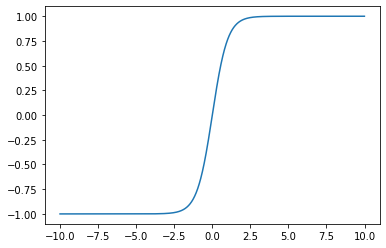

In [5]:
x = np.arange(-10, 10, 0.01)
plt.plot(x,tanh(x))

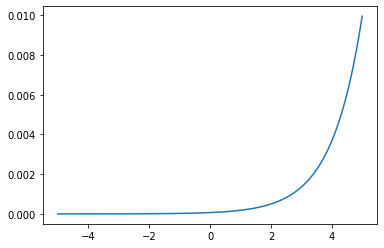

In [12]:
#def softmax(z):
#    exp = np.exp(z)
#    return exp/exp.sum()
def softmax(z):
    exp = np.exp(z-z.max())
    return exp/(exp.sum())
softmax(np.array([1,2,3,4]))
x=np.arange(-5,5,0.01)
plt.plot(x, softmax(x))

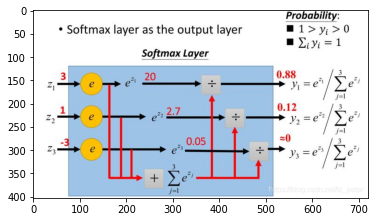

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/home/victor/workspace/06_machine_learning/03_neural_network/softmax.png")
plt.imshow(img)

In [7]:
import math
M_Dim = [28*28, 10]
W = [-math.sqrt(6 / (M_Dim[0] + M_Dim[1])), math.sqrt(6 / (M_Dim[0] + M_Dim[1]))]
b = [0,0]
A = [tanh, softmax]
Layer = [
            {'b':b, 'w':[1,1]},
            {'b':b, 'w':W}   # dict
        ]

In [8]:
def init_param_b(layer_num):
    if layer_num is 0 or 1:
        b = Layer[layer_num]['b']
        return np.random.rand(M_Dim[layer_num], 1) * (b[1] - b[0]) + b[0]   #返回一个或一组服从“0~1”均匀分布的随机样本值。随机样本取值范围是[0,1)
test_init_param_b = init_param_b(0)
print(test_init_param_b.shape)

def init_param_w(layer_num):
    if layer_num is 1:
        w = Layer[layer_num]['w']
        return np.random.rand(M_Dim[layer_num-1], M_Dim[1]) * (w[1] - w[0]) + w[0]
    if layer_num is 0:
        w = Layer[layer_num]['w']
        return np.random.rand(1, 1) * (w[1] - w[0]) + w[0]
test_init_param_w = init_param_w(1)
print(test_init_param_w.shape)

(784, 1)
(784, 10)


In [9]:
def predict(img):  # img = 784 * 1
    Out0 = A[0]((np.dot(img, init_param_w(0)) + init_param_b(0)).T[0])
    print(Out0.shape)
    In0 = Out0.reshape(1, len(Out0))
    print(In0.shape)
    Out1 = A[1]((np.dot(In0, init_param_w(1)) + init_param_b(1))[0])
    print(Out1.shape)
    return Out1

test_predict = predict(np.random.rand(784, 1))
print(test_predict.shape)
test_predict.argmax()

(784,)
(1, 784)
(10,)
(10,)


0

(784,)
(784,)
(1, 784)
(10,)
[0.08759928 0.10683308 0.06820821 0.13683826 0.08698329 0.07764633
 0.11007691 0.12448128 0.04880289 0.15253047]


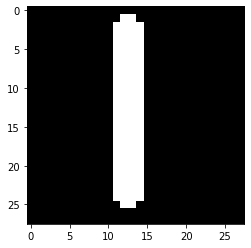

In [10]:
from PIL import Image 
def img2vector(imgFile):
    img = Image.open(imgFile).convert('L')
    img_arr = np.array(img, 'i') # 20px * 20px 灰度图像
    img_normlization = np.round(img_arr/255) # 对灰度值进行归一化
    img_arr2 = np.reshape(img_normlization, (1,-1)) # 1 * 400 矩阵
    return img_arr2

test_img2vector = img2vector('/home/victor/workspace/06_machine_learning/03_neural_network/1.png')
im = np.reshape(test_img2vector[0],(28,28))
plt.imshow(im, cmap='gray')

print(test_img2vector[0].shape)
print(predict(test_img2vector[0].reshape(len(test_img2vector[0]), 1)))

(2051, 60000, 28, 28)
(2051, 10000, 28, 28)
Help on built-in function unpack in module _struct:

unpack(...)
    unpack(fmt, buffer) -> (v1, v2, ...)
    
    Return a tuple containing values unpacked according to the format string
    fmt.  The buffer's size in bytes must be calcsize(fmt). See help(struct)
    for more on format strings.

(2049, 60000)
(2049, 10000)
9


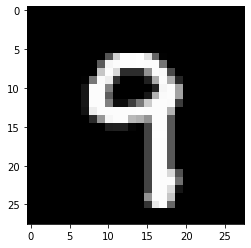

In [46]:
# t10k-images-idx3-ubyte
# t10k-labels-idx1-ubyte
# train-images-idx3-ubyte
# train-labels-idx1-ubyte
# /home/victor/workspace/06_machine_learning/03_neural_network/

train_img_path = "./MNIST/train-images.idx3-ubyte"
train_lab_path = "./MNIST/train-labels.idx1-ubyte"
test_lab_path = "./MNIST/t10k-labels.idx1-ubyte"
test_img_path = "./MNIST/t10k-images.idx3-ubyte"

train_img_num = 50000
valid_img_num = 10000
test_img_num = 10000

import struct
with open(train_img_path, "rb") as f:
    print(struct.unpack(">4i", f.read(4*4)))
    tmp_img = np.fromfile(f, dtype = np.uint8).reshape(-1, 28*28)
    train_img = tmp_img[:train_img_num]
    valid_img = tmp_img[train_img_num:]

with open(test_img_path, "rb") as f:
    print(struct.unpack(">4i", f.read(4*4)))
    test_img = np.fromfile(f, dtype = np.uint8).reshape(-1, 28*28)

help(struct.unpack)
with open(train_lab_path, "rb") as f:
    print(struct.unpack(">2i", f.read(2*4)))
    tmp_lab = np.fromfile(f, dtype = np.uint8)
    train_lab = tmp_lab[:train_img_num]
    valid_lab = tmp_lab[train_img_num:]

with open(test_lab_path, "rb") as f:
    print(struct.unpack(">2i", f.read(2*4)))
    test_lab = np.fromfile(f, dtype = np.uint8)

#img = train_img[0].reshape(28, 28)
#plt.imshow(img, cmap="gray")

def show_train(i):
    plt.imshow(train_img[i].reshape(28, 28), cmap="gray")
    print(train_lab[i])
def show_valid(i):
    plt.imshow(valid_img[i].reshape(28, 28), cmap="gray")
    print(valid_lab[i])
def show_test(index):
    plt.imshow(test_img[index].reshape(28, 28), cmap="gray")
    print(test_lab[index])

#show_train(np.random.randint(0, train_img_num))
show_valid(np.random.randint(0, valid_img_num))
#show_test(np.random.randint(0, test_img_num))
